# Introduction

### Objective

The objective of this analyst is to examine a dataset of 200 difference bacteria species to understand their distribution, typical habitats, and their potential harmfulness to humans.

- Distribution of Bacterial Families
- Habitat Analysis
- Harmfulness to Humans
- Correlation Between Habitat and Harmfulness

### Data Loading and Inspection

In [52]:
import os

In [53]:
os.listdir()

['BacData Insights.ipynb', 'bacteria_list_200.csv', '.ipynb_checkpoints']

In [54]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
df=pandas.read_csv("bacteria_list_200.csv")
df

,Name,Family,Where Found,Harmful to Humans
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,Bacillus subtilis,Bacillaceae,Soil,No
4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes
...,...,...,...,...
194,Rathayibacter toxicus,Microbacteriaceae,Infected grasses,Yes
195,Simonsiella muelleri,Simonsiellaceae,Animal mucous membranes,No
196,Tepidimonas arfidensis,Comamonadaceae,Thermal springs,No
197,Ulvibacter litoralis,Flavobacteriaceae,Marine environments,No


### Summarize Dataset

In [56]:
# Display the first few rows, summary statistics of the DataFrame, and show the plot
print(df.head())
print(df.describe())
plt.show()

                        Name              Family  \
0           Escherichia coli  Enterobacteriaceae   
1      Staphylococcus aureus   Staphylococcaceae   
2  Lactobacillus acidophilus    Lactobacillaceae   
3          Bacillus subtilis         Bacillaceae   
4      Clostridium botulinum      Clostridiaceae   

                     Where Found Harmful to Humans  
0               Intestinal tract               Yes  
1           Skin, nasal passages               Yes  
2        Human mouth & intestine                No  
3                           Soil                No  
4  Soil, improperly canned foods               Yes  
                         Name              Family Where Found  \
count                     199                 199         199   
unique                    194                  93         120   
top     Gardnerella vaginalis  Enterobacteriaceae        Soil   
freq                        2                  21          17   

       Harmful to Humans  
count           

### Distribution of Bacteria

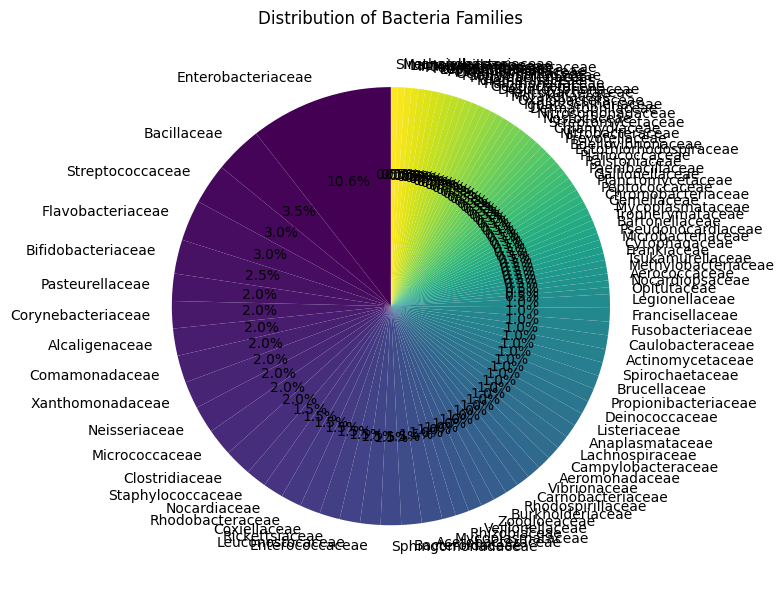

In [40]:
# Count the number of bacteria in each family
family_counts = df['Family'].value_counts()

# Plot the counts as a pie chart
plt.figure(figsize=(10, 6))
family_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Distribution of Bacteria Families')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [41]:
# Get the count of each unique value in the 'Family' column and display the top 10 most common
family_distribution = df['Family'].value_counts()
family_distribution.head(10)

Family
Enterobacteriaceae    21
Bacillaceae            7
Streptococcaceae       6
Flavobacteriaceae      6
Bifidobacteriaceae     5
Pasteurellaceae        4
Corynebacteriaceae     4
Alcaligenaceae         4
Comamonadaceae         4
Xanthomonadaceae       4
Name: count, dtype: int64

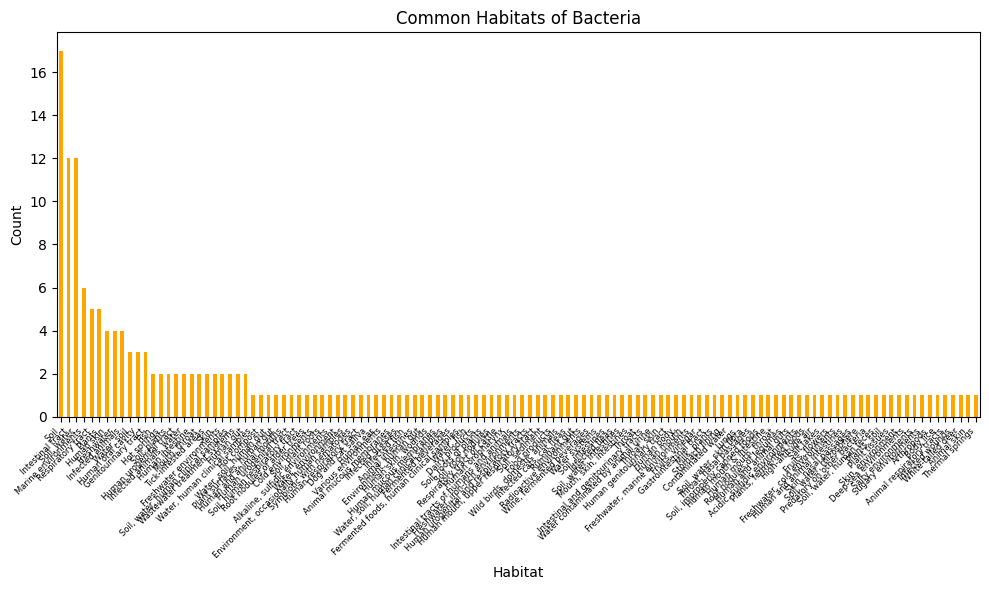

In [42]:
# Count the occurrences of each habitat
habitat_counts = df['Where Found'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
habitat_counts.plot(kind='bar', color='orange')
plt.title('Common Habitats of Bacteria')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.tight_layout()
plt.show()

In [43]:
# Get the count of each unique value in the 'Where Found' column and display the top 10 most common
habitat_distribution = df['Where Found'].value_counts()
habitat_distribution.head(10)

Where Found
Soil                   17
Intestinal tract       12
Soil, water            12
Marine environments     6
Respiratory tract       5
Plants                  5
Human skin              4
Freshwater              4
Infected animals        4
Water, soil             3
Name: count, dtype: int64

In [44]:
# Count the number of bacteria that are harmful and not harmful
harmful_count = df[df['Harmful to Humans'] == 'Yes'].shape[0]
not_harmful_count = df[df['Harmful to Humans'] == 'No'].shape[0]

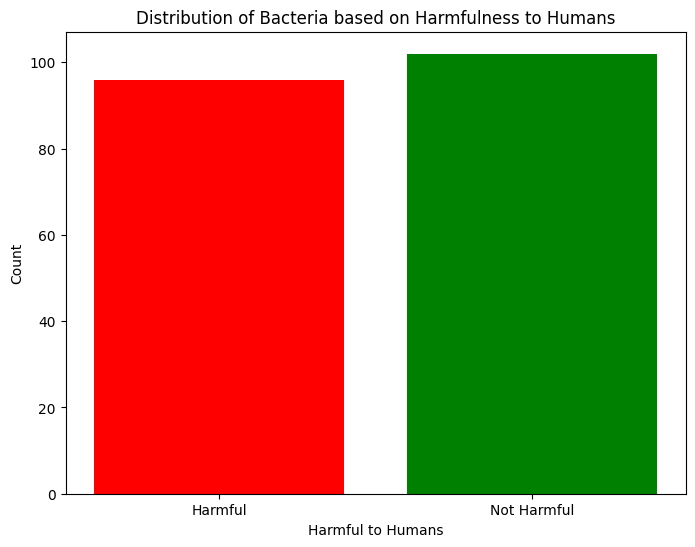

In [45]:
# Plot the counts
plt.figure(figsize=(8, 6))
plt.bar(['Harmful', 'Not Harmful'], [harmful_count, not_harmful_count], color=['red', 'green'])
plt.title('Distribution of Bacteria based on Harmfulness to Humans')
plt.xlabel('Harmful to Humans')
plt.ylabel('Count')
plt.show()

In [46]:
# Get the count of each unique value in the 'Harmful to Humans' column and display the distribution
harmfulness_distribution = df['Harmful to Humans'].value_counts()
harmfulness_distribution

Harmful to Humans
No      102
Yes      96
 Yes      1
Name: count, dtype: int64

In [47]:
# Calculate the proportion of harmful bacteria
harmful_proportion = df['Harmful to Humans'].value_counts(normalize=True)['Yes']

print("Proportion of Harmful Bacteria:", harmful_proportion)


Proportion of Harmful Bacteria: 0.4824120603015075


In [48]:
# Calculate the proportion of harmful bacteria by family
harmful_by_family = df[df['Harmful to Humans'] == 'Yes']['Family'].value_counts(normalize=True)

print("Proportion of Harmful Bacteria by Family:")
print(harmful_by_family)


Proportion of Harmful Bacteria by Family:
Family
Enterobacteriaceae     0.114583
Flavobacteriaceae      0.052083
Neisseriaceae          0.041667
Pasteurellaceae        0.041667
Corynebacteriaceae     0.041667
Streptococcaceae       0.041667
Nocardiaceae           0.031250
Coxiellaceae           0.031250
Clostridiaceae         0.031250
Alcaligenaceae         0.031250
Campylobacteraceae     0.020833
Legionellaceae         0.020833
Spirochaetaceae        0.020833
Burkholderiaceae       0.020833
Mycoplasmataceae       0.020833
Aeromonadaceae         0.020833
Rickettsiaceae         0.020833
Bifidobacteriaceae     0.020833
Vibrionaceae           0.020833
Xanthomonadaceae       0.020833
Anaplasmataceae        0.020833
Francisellaceae        0.020833
Tropherymataceae       0.010417
Rhodospirillaceae      0.010417
Pseudonocardiaceae     0.010417
Fusobacteriaceae       0.010417
Bartonellaceae         0.010417
Chromobacteriaceae     0.010417
Tsukamurellaceae       0.010417
Ralstoniaceae          

In [49]:
# Filter dataframe for harmful bacteria
harmful_df = df[df['Harmful to Humans'] == 'Yes']

# Count the occurrences of each habitat for harmful bacteria
harmful_habitat_counts = harmful_df['Where Found'].value_counts()

print("Common Habitats of Harmful Bacteria:")
print(harmful_habitat_counts)


Common Habitats of Harmful Bacteria:
Where Found
Intestinal tract        6
Respiratory tract       5
Soil                    5
Infected animals        4
Plants                  4
                       ..
White-tailed deer       1
Infected wounds         1
Skin, nasal passages    1
Body lice               1
Marine environments     1
Name: count, Length: 63, dtype: int64


<Figure size 2000x1200 with 0 Axes>

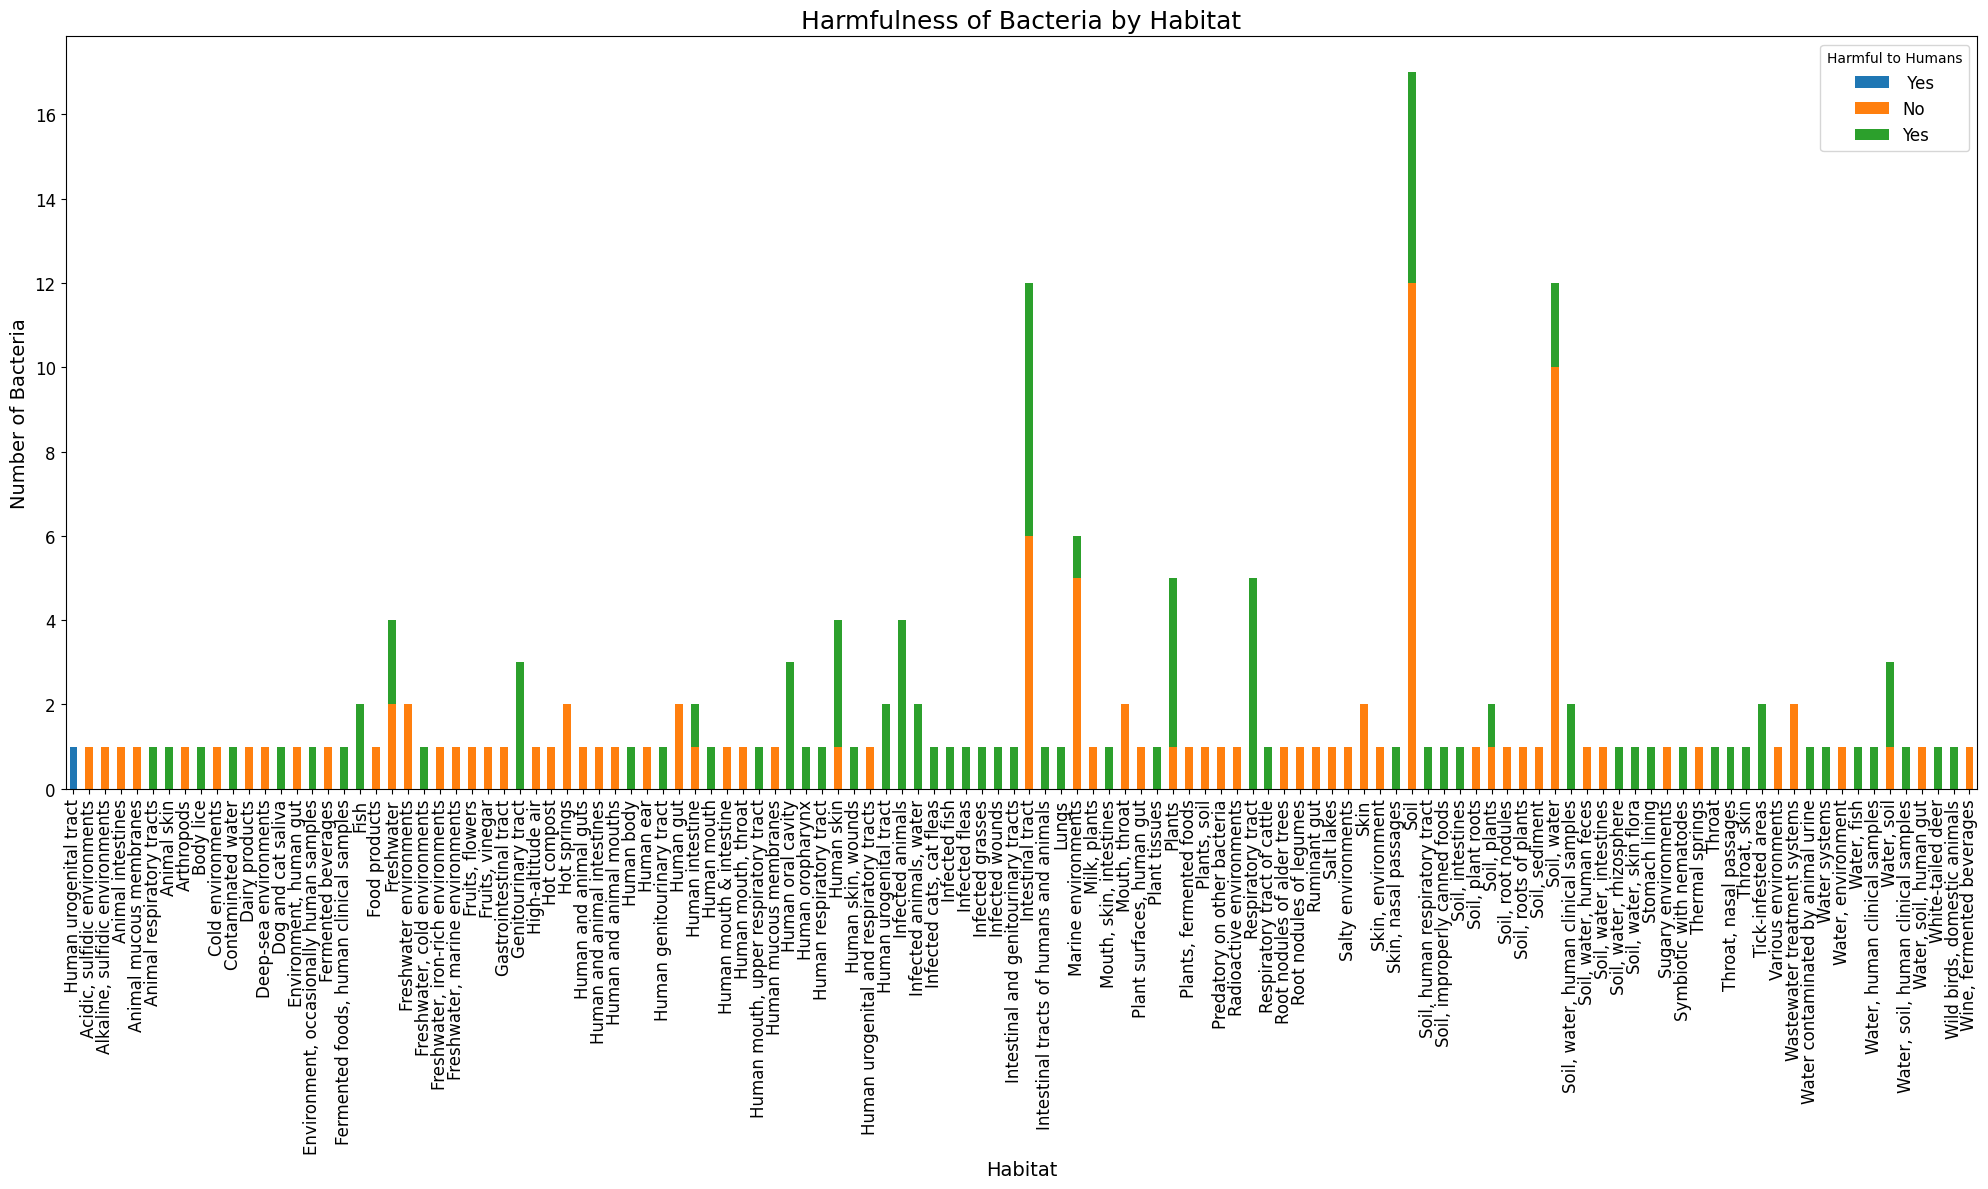

In [50]:
# Group the data by habitat and harmfulness
harmful_by_habitat = df.groupby(['Where Found', 'Harmful to Humans']).size().unstack()

# Plot the correlation between habitat and harmfulness
plt.figure(figsize=(20, 12))
harmful_by_habitat.plot(kind='bar', stacked=True, figsize=(20, 12))
plt.title('Harmfulness of Bacteria by Habitat', fontsize=18)
plt.xlabel('Habitat', fontsize=14)
plt.ylabel('Number of Bacteria', fontsize=14)
plt.legend(title='Harmful to Humans', loc='upper right', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
# Create a table of counts of 'Harmful to Humans' values for each 'Where Found' category and display the result
harmful_by_habitat = df.groupby(['Where Found', 'Harmful to Humans']).size().unstack()
harmful_by_habitat

Harmful to Humans,Yes,No,Yes
Where Found,,,
Human urogenital tract,1.0,NaN,NaN
"Acidic, sulfidic environments",NaN,1.0,NaN
"Alkaline, sulfidic environments",NaN,1.0,NaN
Animal intestines,NaN,1.0,NaN
Animal mucous membranes,NaN,1.0,NaN
...,...,...,...
"Water, soil, human clinical samples",NaN,NaN,1.0
"Water, soil, human gut",NaN,1.0,NaN
White-tailed deer,NaN,NaN,1.0


### Conclusion

1. Bacterial Families:

    - The dataset is multiple, with Enterobacteriaceae is being the most common family.

2. Habitat Insights:

    - Soil and intestinal tracts are the most common habitats for these bacterias.
    - Marine and freshwater environments are also host a significant number of bacteria.

3. Harmfulness to Humans:

    - There is a roughly equal between harmful and non-harmful bacteria, highlighting the importance of identifying and managing harmful bacteria
      for public health.

4. Habitat and Harmfulness Correlation:

    - Certain environments like the intestinal tract and improperly canned foods are associated with harmful bacterias, indicating potential areas for         public health interventions.

### References

**Datasets**:
- Karunarathna, Kanchana. (2024). *Bacteria Dataset*. Kaggle. Retrieved from https://www.kaggle.com/datasets/kanchana1990/bacteria-dataset on May 09, 2024. Licensed under ODC Attribution License (ODC-By).